In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in the raw-january data from raw-january.csv
profiles = pd.read_csv('LGA_profiles_2011.csv')

#profiles['total_offenses']['273.143430'] = '90'

# Read in the raw june data from raw-june.csv
community = pd.read_csv('LGA_community_strength.csv')
community

lga_names = pd.read_csv('LGA_names.csv')
data_sets = [profiles, community, lga_names]
profiles

,unemployment_rate,registered_mental_health,perc_parents_schools,perc_membership_groups,new_dwellings,drug_and_alcohol,perc_children_vulnerable_one,perc_poor_health,perc_people_18_smokers,acsc_vaccine_preventablem,perc_persons_not_physical,lga_code,total_offences,gaming_machine_losses,perc_at_risk_alcohol,perc_households_income_650,perc_persons_not_fruitveg,perc_pop_higher_education,perc_persons_overweight_obese,median_house_price
0,3.848397,12.223466,0.4331,0.7427,1.205130,21.6923474218817,18.666667,16.8625,23.1683,1.032969,26.0969,22250,55.866403,165.8349,13.9000,0.440954,60.3187,0.210084,0.510165,140000.0
1,5.163348,7.940203,0.4135,0.6763,9.164716,3.37378903933111,13.831899,12.9318,13.5915,0.535725,25.8887,26980,38.765129,453.6777,8.8824,0.281805,44.3625,0.541612,0.461040,705888.0
2,4.474039,25.041355,0.5626,0.7441,3.479551,4.73447036677885,15.425532,16.4382,18.9981,0.741544,20.9095,26260,52.078455,489.0196,16.4002,0.387490,47.6137,0.295282,0.592417,185000.0
3,4.133032,9.482662,0.5358,0.6331,4.535593,4.11476452324842,19.316081,15.5455,17.1151,0.523697,26.7304,24410,55.150886,831.4869,10.4000,0.265298,45.2593,0.365910,0.480442,520000.0
4,2.876663,8.712699,0.6324,0.7679,1.306905,4.79198431714223,18.750000,16.9391,23.1695,0.435635,21.4392,26890,21.527075,0.0000,12.3842,0.433940,54.5202,0.231472,0.614828,104000.0
5,4.194133,5.000419,0.6214,0.6626,6.040775,2.04715160667841,14.212766,14.6010,14.5874,0.696367,28.4712,24210,28.953833,686.8253,5.2000,0.233085,42.6425,0.523976,0.455692,750000.0
6,4.238329,13.873561,0.6694,0.7018,3.468390,2.68011981712124,27.692308,13.2158,17.3616,0.000000,21.3180,26670,32.381003,80.8267,11.6352,0.429016,44.9083,0.256917,0.567042,142000.0
7,3.534915,9.675583,0.7814,0.7807,1.565168,3.41491178144565,24.193548,15.9112,23.2273,1.707456,26.0478,21270,48.902533,0.0000,9.5000,0.509160,51.0459,0.281510,0.597116,88000.0
8,6.970976,25.084197,0.5631,0.6620,5.465889,10.0299979755967,24.871355,20.5693,18.2346,0.699339,27.9279,24780,90.252655,603.4244,15.4000,0.392401,53.1676,0.278756,0.569159,210000.0
9,5.210553,6.575165,0.3933,0.5517,8.839900,3.9310174881385,25.952656,23.3914,20.0845,0.606276,31.2431,21610,53.364815,625.3168,10.7357,0.232065,51.9408,0.269685,0.536367,375000.0


In [3]:
for i in profiles.columns:
    print (i)

unemployment_rate
 registered_mental_health
 perc_parents_schools
 perc_membership_groups
 new_dwellings
 drug_and_alcohol
 perc_children_vulnerable_one
 perc_poor_health
 perc_people_18_smokers
 acsc_vaccine_preventablem
 perc_persons_not_physical
 lga_code
 total_offences
 gaming_machine_losses
 perc_at_risk_alcohol
 perc_households_income_650
 perc_persons_not_fruitveg
 perc_pop_higher_education
 perc_persons_overweight_obese
 median_house_price


In [4]:
#remove whitespace from the column titles
for data in data_sets:
    
    no_whitespace = [] #the data space that contains no whitespace col titles
    for i in range(len(data.columns)):
        no_whitespace.append(data.columns[i].strip())
    data.columns = no_whitespace

profiles

,unemployment_rate,registered_mental_health,perc_parents_schools,perc_membership_groups,new_dwellings,drug_and_alcohol,perc_children_vulnerable_one,perc_poor_health,perc_people_18_smokers,acsc_vaccine_preventablem,perc_persons_not_physical,lga_code,total_offences,gaming_machine_losses,perc_at_risk_alcohol,perc_households_income_650,perc_persons_not_fruitveg,perc_pop_higher_education,perc_persons_overweight_obese,median_house_price
0,3.848397,12.223466,0.4331,0.7427,1.205130,21.6923474218817,18.666667,16.8625,23.1683,1.032969,26.0969,22250,55.866403,165.8349,13.9000,0.440954,60.3187,0.210084,0.510165,140000.0
1,5.163348,7.940203,0.4135,0.6763,9.164716,3.37378903933111,13.831899,12.9318,13.5915,0.535725,25.8887,26980,38.765129,453.6777,8.8824,0.281805,44.3625,0.541612,0.461040,705888.0
2,4.474039,25.041355,0.5626,0.7441,3.479551,4.73447036677885,15.425532,16.4382,18.9981,0.741544,20.9095,26260,52.078455,489.0196,16.4002,0.387490,47.6137,0.295282,0.592417,185000.0
3,4.133032,9.482662,0.5358,0.6331,4.535593,4.11476452324842,19.316081,15.5455,17.1151,0.523697,26.7304,24410,55.150886,831.4869,10.4000,0.265298,45.2593,0.365910,0.480442,520000.0
4,2.876663,8.712699,0.6324,0.7679,1.306905,4.79198431714223,18.750000,16.9391,23.1695,0.435635,21.4392,26890,21.527075,0.0000,12.3842,0.433940,54.5202,0.231472,0.614828,104000.0
5,4.194133,5.000419,0.6214,0.6626,6.040775,2.04715160667841,14.212766,14.6010,14.5874,0.696367,28.4712,24210,28.953833,686.8253,5.2000,0.233085,42.6425,0.523976,0.455692,750000.0
6,4.238329,13.873561,0.6694,0.7018,3.468390,2.68011981712124,27.692308,13.2158,17.3616,0.000000,21.3180,26670,32.381003,80.8267,11.6352,0.429016,44.9083,0.256917,0.567042,142000.0
7,3.534915,9.675583,0.7814,0.7807,1.565168,3.41491178144565,24.193548,15.9112,23.2273,1.707456,26.0478,21270,48.902533,0.0000,9.5000,0.509160,51.0459,0.281510,0.597116,88000.0
8,6.970976,25.084197,0.5631,0.6620,5.465889,10.0299979755967,24.871355,20.5693,18.2346,0.699339,27.9279,24780,90.252655,603.4244,15.4000,0.392401,53.1676,0.278756,0.569159,210000.0
9,5.210553,6.575165,0.3933,0.5517,8.839900,3.9310174881385,25.952656,23.3914,20.0845,0.606276,31.2431,21610,53.364815,625.3168,10.7357,0.232065,51.9408,0.269685,0.536367,375000.0


In [5]:
for i in profiles.columns:
    print (i)
print()
print("****************************")
print()
for i in community.columns:
    print (i)

unemployment_rate
registered_mental_health
perc_parents_schools
perc_membership_groups
new_dwellings
drug_and_alcohol
perc_children_vulnerable_one
perc_poor_health
perc_people_18_smokers
acsc_vaccine_preventablem
perc_persons_not_physical
lga_code
total_offences
gaming_machine_losses
perc_at_risk_alcohol
perc_households_income_650
perc_persons_not_fruitveg
perc_pop_higher_education
perc_persons_overweight_obese
median_house_price

****************************

cs_vol_syn_5_rrm_8_10_11_10
cs_cul_syn_3_lci_8_10_11_10
area_code
volun_abs_3_percent_6_11_6_11
cs_cul_syn_4_uci_8_10_11_10
cs_cul_syn_1_no_8_10_11_10
cs_saf_syn_1_no_8_10_11_10
cs_psup_syn_1_no_8_10_11_10
area_name
cs_gsup_syn_1_no_8_10_11_10
cs_vol_syn_3_lci_8_10_11_10
cs_gsup_syn_5_rrm_8_10_11_10
cs_vol_syn_1_no_8_10_11_10
cs_saf_syn_4_uci_8_10_11_10
cs_psup_syn_3_lci_8_10_11_10
cs_psup_syn_2_rate_8_10_11_10
cs_gsup_syn_3_lci_8_10_11_10
volun_abs_2_denom_6_11_6_11
cs_gsup_syn_2_rate_8_10_11_10
cs_cul_syn_5_rrm_8_10_11_10
cs_sa

In [6]:
cols = list(community.columns.values)
community.rename(columns = {'area_code':'lga_code'}, inplace = True)
community

,cs_vol_syn_5_rrm_8_10_11_10,cs_cul_syn_3_lci_8_10_11_10,lga_code,volun_abs_3_percent_6_11_6_11,cs_cul_syn_4_uci_8_10_11_10,cs_cul_syn_1_no_8_10_11_10,cs_saf_syn_1_no_8_10_11_10,cs_psup_syn_1_no_8_10_11_10,area_name,cs_gsup_syn_1_no_8_10_11_10,...,cs_saf_syn_3_lci_8_10_11_10,cs_psup_syn_5_rrm_8_10_11_10,volun_abs_1_no_6_11_6_11,cs_vol_syn_2_rate_8_10_11_10,cs_gsup_syn_4_uci_8_10_11_10,cs_cul_syn_2_rate_8_10_11_10,cs_vol_syn_4_uci_8_10_11_10,cs_saf_syn_2_rate_8_10_11_10,cs_psup_syn_4_uci_8_10_11_10,cs_saf_syn_5_rrm_8_10_11_10
0,3.0,-0.461900,20110,29.087588,11.227385,614.591603,5156.264257327,2822.47378032316,Alpine (S),9403.84133746665,...,34.0042797475324,3.0,2866.0,43.6024631821231,96.7612059621804,5.382743,51.3519608418486,52.9523744952256,33.8752354741918,3.0
1,3.0,-3.580479,20260,26.892582,12.885571,479.990963,4830.26804611247,2598.94724977465,Ararat (RC),8725.90052117021,...,27.2358933030837,3.0,2476.0,42.942591997412,97.6931995098147,4.652546,53.6574489114236,53.1351817366192,36.0359092909256,3.0
2,3.0,0.140307,20570,20.436716,10.472846,3921.196015,38134.3331217197,20220.5635497277,Ballarat (C),68474.4091615294,...,37.8877968630079,3.0,15396.0,44.0947421435695,95.8828964466209,5.306577,50.3049493523025,52.3791584386806,33.0808037506811,3.0
3,3.0,-1.586733,20660,18.124036,11.017434,4721.180953,45365.4669947878,28541.9458494289,Banyule (C),91764.1635136457,...,28.9385892012958,3.0,17622.0,37.0235923363761,96.9464252638762,4.715350,44.5904063607021,46.7525235421059,35.4016534564858,3.0
4,3.0,-0.751290,20740,22.446986,11.212015,1465.369236,12215.873436164,6701.37303816816,Bass Coast (S),22837.9478415116,...,32.1360958055963,3.0,5515.0,42.7433446121545,96.1116921673761,5.230363,50.8143679481706,51.8888334910114,33.6729770949939,3.0
5,3.0,-2.773514,20830,23.909937,10.900174,1382.831107,16955.9164097198,9221.7814304874,Baw Baw (S),30243.6264084129,...,32.9206782109597,3.0,8198.0,43.7830478469157,97.0949221528563,4.063330,52.1870007203929,52.9791796459959,35.141055137994,3.0
6,3.0,-1.965875,20910,21.324645,10.483566,3349.778202,35392.3612356118,22915.6213596426,Bayside (C),70267.666436364,...,30.2160382998843,3.0,15741.0,40.2215984696897,98.1902511181887,4.258846,47.8216283817599,48.4344545220596,36.9433342055417,3.0
7,3.0,-0.821624,21010,26.533511,11.307281,641.257768,5510.25218388078,3072.36633385873,Benalla (RC),10245.7328451794,...,32.8138368779675,3.0,2989.0,43.7893280347956,96.9977413280624,5.242828,51.8078237749181,52.2907180591567,34.4438159730103,3.0
8,3.0,-0.394039,21110,23.609801,8.962585,5687.511965,64684.5172408378,41308.8513663995,Boroondara (C),125035.931962407,...,36.2586336533438,3.0,31028.0,40.1660105781587,96.543552892225,4.284273,45.6238009786173,48.9757481346297,35.9727331032085,3.0
9,3.0,1.482180,21180,9.007395,14.445540,11217.566578,62954.4931260969,41858.3619039691,Brimbank (C),130137.602655662,...,25.3778589635237,3.0,13325.0,28.9143011590355,92.4453931260457,7.963860,36.345103326458,42.5968723086464,34.6869481175222,3.0


In [7]:
profiles = profiles.sort_values("lga_code")
community = community.sort_values("lga_code")
lga_names = lga_names.sort_values('lga_code')
community["lga_code"]

0     20110
1     20260
2     20570
3     20660
4     20740
5     20830
6     20910
7     21010
8     21110
9     21180
10    21270
11    21370
12    21450
13    21610
14    21670
15    21750
16    21830
17    21890
18    22110
19    22170
20    22250
25    22310
21    22410
22    22490
23    22620
24    22670
26    22750
27    22830
28    22910
29    22980
      ...  
50    25150
51    25250
52    25340
53    25430
54    25490
55    25620
56    25710
57    25810
58    25900
59    25990
60    26080
61    26170
62    26260
63    26350
64    26430
65    26490
66    26610
67    26670
68    26700
69    26730
70    26810
71    26890
72    26980
73    27070
74    27170
75    27260
76    27350
77    27450
78    27630
79    29399
Name: lga_code, dtype: int64

In [8]:
profiles = profiles.reset_index(drop=True)
lga_names = lga_names.reset_index(drop=True)
profiles

,unemployment_rate,registered_mental_health,perc_parents_schools,perc_membership_groups,new_dwellings,drug_and_alcohol,perc_children_vulnerable_one,perc_poor_health,perc_people_18_smokers,acsc_vaccine_preventablem,perc_persons_not_physical,lga_code,total_offences,gaming_machine_losses,perc_at_risk_alcohol,perc_households_income_650,perc_persons_not_fruitveg,perc_pop_higher_education,perc_persons_overweight_obese,median_house_price
0,4.903835,16.477538,0.5151,0.6600,6.762008,3.88621172081455,14.516129,18.9998,19.6913,0.854967,26.0961,20110,30.160726,308.9195,11.6000,0.424966,48.4892,0.292141,0.559862,241000.0
1,5.724736,21.120905,0.5110,0.6248,3.492433,9.23000166306336,20.338983,21.1998,20.8768,0.665225,28.1661,20260,72.833477,552.9145,10.0000,0.425102,57.6075,0.249561,0.591836,170000.0
2,7.106465,15.036890,0.4699,0.6387,10.676712,5.7858205771252,20.615385,19.5012,23.6388,0.832492,24.4215,20570,87.259496,756.3957,11.5000,0.370103,54.9718,0.368236,0.499760,262877.0
3,3.044748,9.682170,0.5749,0.5851,4.072467,4.17709599272429,14.634146,15.8184,18.0394,0.788739,27.0449,20660,51.873579,601.2545,10.6000,0.263060,41.6417,0.485552,0.496025,580000.0
4,5.083693,12.074643,0.5546,0.6901,19.274230,9.81468328275328,22.442244,15.9688,19.4213,0.645703,20.2997,20740,62.132908,747.9083,17.2000,0.479231,47.9119,0.267306,0.511050,330000.0
5,4.066393,9.878614,0.5053,0.6395,16.611915,4.91600848069709,22.466960,15.0738,17.5935,0.396077,29.6508,20830,44.595126,400.6032,11.0000,0.357962,48.9811,0.287301,0.512713,265000.0
6,2.585145,6.846006,0.5727,0.6666,6.517069,2.90903857816885,10.540301,12.3365,13.1584,0.555082,20.1377,20910,35.803948,250.5094,13.5000,0.220770,42.5605,0.597869,0.408612,1230000.0
7,6.585849,22.528510,0.4339,0.6440,5.667110,7.97593227453998,22.142857,21.8970,17.4198,1.049465,28.1876,21010,62.254600,468.1479,9.3000,0.407638,44.9586,0.273595,0.539362,221500.0
8,3.248919,7.038057,0.5281,0.7330,4.902452,2.69605385028347,10.753822,12.7996,13.6133,0.607645,27.6519,21110,33.448679,153.4116,6.2000,0.200073,42.4090,0.694994,0.321365,1320000.0
9,7.981622,10.475959,0.5161,0.4703,4.878925,5.50727086479465,26.902039,25.5270,22.0037,1.256693,31.2520,21180,80.828434,1004.3683,4.7000,0.335125,43.4408,0.345093,0.521993,397500.0


In [9]:
if (community["lga_code"][0] in list(community["lga_code"])):
    print ("Yes")
community["lga_code"][0]

Yes


20110

In [10]:
community
# Move column duration to the first column to get the required output
n=0
print(community.index[21])
print()
comList = list(community["lga_code"])
profileList = list(profiles["lga_code"])

#community = community.drop(community.index[21])
for i in profiles["lga_code"]:
    if i not in comList:
        print (i)

for i in community["lga_code"]:
    if i not in profileList:
        print (i)
        idx = community["lga_code"][community["lga_code"] == i].index[0]
        print(idx)
        community = community.drop(community.index[idx])
community

25

29399
79


,cs_vol_syn_5_rrm_8_10_11_10,cs_cul_syn_3_lci_8_10_11_10,lga_code,volun_abs_3_percent_6_11_6_11,cs_cul_syn_4_uci_8_10_11_10,cs_cul_syn_1_no_8_10_11_10,cs_saf_syn_1_no_8_10_11_10,cs_psup_syn_1_no_8_10_11_10,area_name,cs_gsup_syn_1_no_8_10_11_10,...,cs_saf_syn_3_lci_8_10_11_10,cs_psup_syn_5_rrm_8_10_11_10,volun_abs_1_no_6_11_6_11,cs_vol_syn_2_rate_8_10_11_10,cs_gsup_syn_4_uci_8_10_11_10,cs_cul_syn_2_rate_8_10_11_10,cs_vol_syn_4_uci_8_10_11_10,cs_saf_syn_2_rate_8_10_11_10,cs_psup_syn_4_uci_8_10_11_10,cs_saf_syn_5_rrm_8_10_11_10
0,3.0,-0.461900,20110,29.087588,11.227385,614.591603,5156.264257327,2822.47378032316,Alpine (S),9403.84133746665,...,34.0042797475324,3.0,2866.0,43.6024631821231,96.7612059621804,5.382743,51.3519608418486,52.9523744952256,33.8752354741918,3.0
1,3.0,-3.580479,20260,26.892582,12.885571,479.990963,4830.26804611247,2598.94724977465,Ararat (RC),8725.90052117021,...,27.2358933030837,3.0,2476.0,42.942591997412,97.6931995098147,4.652546,53.6574489114236,53.1351817366192,36.0359092909256,3.0
2,3.0,0.140307,20570,20.436716,10.472846,3921.196015,38134.3331217197,20220.5635497277,Ballarat (C),68474.4091615294,...,37.8877968630079,3.0,15396.0,44.0947421435695,95.8828964466209,5.306577,50.3049493523025,52.3791584386806,33.0808037506811,3.0
3,3.0,-1.586733,20660,18.124036,11.017434,4721.180953,45365.4669947878,28541.9458494289,Banyule (C),91764.1635136457,...,28.9385892012958,3.0,17622.0,37.0235923363761,96.9464252638762,4.715350,44.5904063607021,46.7525235421059,35.4016534564858,3.0
4,3.0,-0.751290,20740,22.446986,11.212015,1465.369236,12215.873436164,6701.37303816816,Bass Coast (S),22837.9478415116,...,32.1360958055963,3.0,5515.0,42.7433446121545,96.1116921673761,5.230363,50.8143679481706,51.8888334910114,33.6729770949939,3.0
5,3.0,-2.773514,20830,23.909937,10.900174,1382.831107,16955.9164097198,9221.7814304874,Baw Baw (S),30243.6264084129,...,32.9206782109597,3.0,8198.0,43.7830478469157,97.0949221528563,4.063330,52.1870007203929,52.9791796459959,35.141055137994,3.0
6,3.0,-1.965875,20910,21.324645,10.483566,3349.778202,35392.3612356118,22915.6213596426,Bayside (C),70267.666436364,...,30.2160382998843,3.0,15741.0,40.2215984696897,98.1902511181887,4.258846,47.8216283817599,48.4344545220596,36.9433342055417,3.0
7,3.0,-0.821624,21010,26.533511,11.307281,641.257768,5510.25218388078,3072.36633385873,Benalla (RC),10245.7328451794,...,32.8138368779675,3.0,2989.0,43.7893280347956,96.9977413280624,5.242828,51.8078237749181,52.2907180591567,34.4438159730103,3.0
8,3.0,-0.394039,21110,23.609801,8.962585,5687.511965,64684.5172408378,41308.8513663995,Boroondara (C),125035.931962407,...,36.2586336533438,3.0,31028.0,40.1660105781587,96.543552892225,4.284273,45.6238009786173,48.9757481346297,35.9727331032085,3.0
9,3.0,1.482180,21180,9.007395,14.445540,11217.566578,62954.4931260969,41858.3619039691,Brimbank (C),130137.602655662,...,25.3778589635237,3.0,13325.0,28.9143011590355,92.4453931260457,7.963860,36.345103326458,42.5968723086464,34.6869481175222,3.0


In [11]:
profiles = profiles.reset_index(drop=True)
community = community.reset_index(drop=True)


#bar chart
#has all per LGk2A_Code
#sorting thing
#age and community volunteering. Higher number of retirees -> can use them for volunteers
# will also increase their sense of community



In [12]:
newLGA = pd.DataFrame({'1': community["lga_code"], '2':profiles["lga_code"]})
newLGA


,1,2
0,20110,20110
1,20260,20260
2,20570,20570
3,20660,20660
4,20740,20740
5,20830,20830
6,20910,20910
7,21010,21010
8,21110,21110
9,21180,21180


In [13]:
offences = pd.DataFrame({'lga_code': community["lga_code"], 'total_offences':profiles["total_offences"], 'support':community["cs_psup_syn_1_no_8_10_11_10"]})


'''
rank_membership_groups
registered_mental_health
perc_membership_groups
lga_code
perc_persons_not_physical
lga_name
total_offences
gaming_machine_losses
perc_at_risk_alcohol
lga
perc_pop_higher_education
perc_adolescents_bullied
perc_persons_overweight_obese
'''
offences

,lga_code,support,total_offences
0,20110,2822.47378032316,30.160726
1,20260,2598.94724977465,72.833477
2,20570,20220.5635497277,87.259496
3,20660,28541.9458494289,51.873579
4,20740,6701.37303816816,62.132908
5,20830,9221.7814304874,44.595126
6,20910,22915.6213596426,35.803948
7,21010,3072.36633385873,62.254600
8,21110,41308.8513663995,33.448679
9,21180,41858.3619039691,80.828434


In [15]:
new_community = pd.DataFrame({'lga_code':community["lga_code"], 'total_offences':community["cs_cul_syn_4_uci_8_10_11_10"], 'volunteering_12m':community["cs_vol_syn_4_uci_8_10_11_10"], 'support':community["cs_gsup_syn_4_uci_8_10_11_10"], 'feel_safe':community["cs_saf_syn_4_uci_8_10_11_10"]})


'''
cs_vol_syn_5_rrm_8_10_11_10
cs_cul_syn_3_lci_8_10_11_10
lga_code
volun_abs_3_percent_6_11_6_11
cs_cul_syn_4_uci_8_10_11_10
cs_cul_syn_1_no_8_10_11_10
cs_saf_syn_1_no_8_10_11_10
cs_psup_syn_1_no_8_10_11_10
cs_gsup_syn_1_no_8_10_11_10
cs_gsup_syn_5_rrm_8_10_11_10
cs_vol_syn_1_no_8_10_11_10
cs_saf_syn_4_uci_8_10_11_10
cs_psup_syn_3_lci_8_10_11_10
cs_psup_syn_2_rate_8_10_11_10
cs_gsup_syn_3_lci_8_10_11_10
volun_abs_2_denom_6_11_6_11
cs_gsup_syn_2_rate_8_10_11_10
cs_cul_syn_5_rrm_8_10_11_10
cs_saf_syn_3_lci_8_10_11_10
cs_psup_syn_5_rrm_8_10_11_10
volun_abs_1_no_6_11_6_11
cs_vol_syn_2_rate_8_10_11_10
cs_gsup_syn_4_uci_8_10_11_10
cs_cul_syn_2_rate_8_10_11_10
cs_vol_syn_4_uci_8_10_11_10
cs_saf_syn_2_rate_8_10_11_10
cs_psup_syn_4_uci_8_10_11_10
cs_saf_syn_5_rrm_8_10_11_10

lga_code
cs_cul_syn_4_uci_8_10_11_10
cs_saf_syn_4_uci_8_10_11_10
cs_gsup_syn_4_uci_8_10_11_10
cs_vol_syn_4_uci_8_10_11_10
'''
new_community

,feel_safe,lga_code,support,total_offences,volunteering_12m
0,71.9004692429187,20110,96.7612059621804,11.227385,51.3519608418486
1,79.0344701701546,20260,97.6931995098147,12.885571,53.6574489114236
2,66.8705200143533,20570,95.8828964466209,10.472846,50.3049493523025
3,64.5664578829161,20660,96.9464252638762,11.017434,44.5904063607021
4,71.6415711764266,20740,96.1116921673761,11.212015,50.8143679481706
5,73.0376810810321,20830,97.0949221528563,10.900174,52.1870007203929
6,66.6528707442349,20910,98.1902511181887,10.483566,47.8216283817599
7,71.767599240346,21010,96.9977413280624,11.307281,51.8078237749181
8,61.6928626159156,21110,96.543552892225,8.962585,45.6238009786173
9,59.8158856537691,21180,92.4453931260457,14.445540,36.345103326458


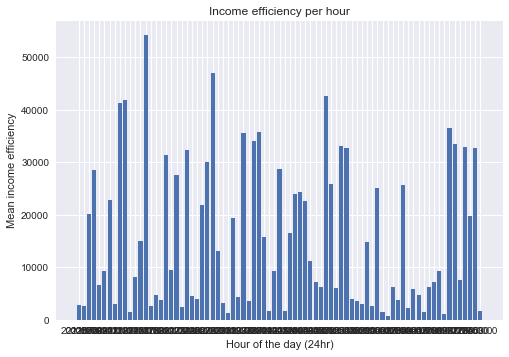

In [16]:
xname = 'lga_code'
yname = 'support'

xaxis = []
yaxis = []

# For each hour in the day, find the mean income_efficiency and put
# the data in hours[] and means[]


for index, row in offences.iterrows():
    xaxis.append(float(row[xname]))
    yaxis.append(float(row[yname]))


# Create the bar chart with xaxis -> hours, yaxis -> means
plt.bar(np.arange(len(yaxis)),yaxis)
plt.xticks(np.arange(len(xaxis)),xaxis)
plt.ylabel('Mean income efficiency')
plt.xlabel('Hour of the day (24hr)')
plt.title('Income efficiency per hour')
plt.axes().yaxis.grid(True, which='major')
plt.show()


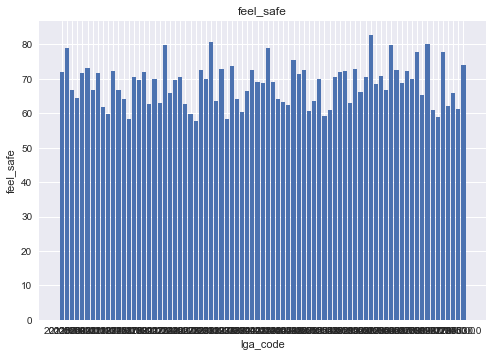

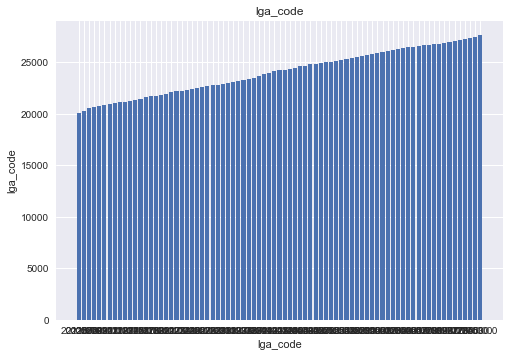

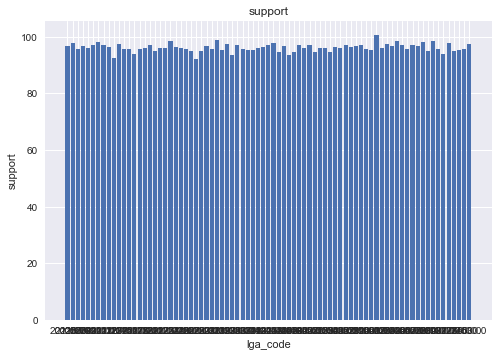

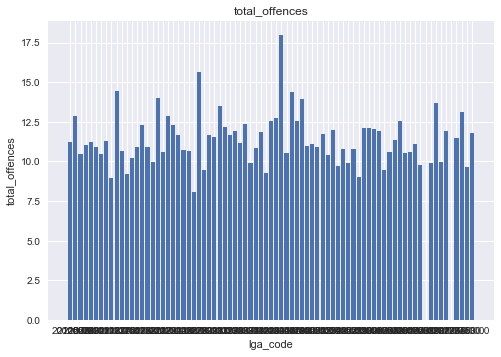

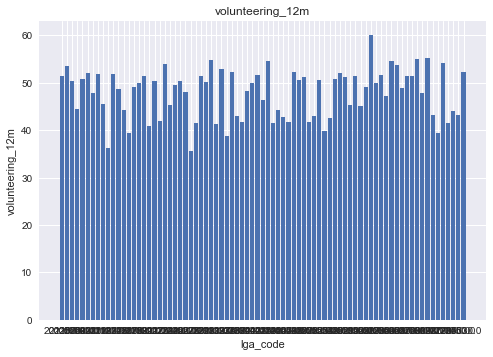

In [17]:
# Part 3
#
# Create the income efficiency column using the formula given

# Initialize the x and y axises:
# hours in the day AND the mean income efficiency per hour

xname = 'lga_code'


xaxis = []
yaxis = []

# For each hour in the day, find the mean income_efficiency and put
# the data in hours[] and means[]

for col in new_community.columns:
    xaxis = []
    yaxis = []
    yname = col
    for index, row in new_community.iterrows():
        xaxis.append(float(row[xname]))
        yaxis.append(float(row[yname]))


    # Create the bar chart with xaxiss -> hours, yaxis -> means
    plt.bar(np.arange(len(yaxis)),yaxis)
    plt.xticks(np.arange(len(xaxis)),xaxis)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(yname)
    plt.axes().yaxis.grid(True, which='major')
    plt.show()


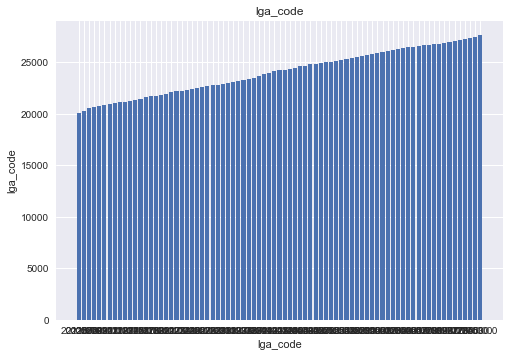

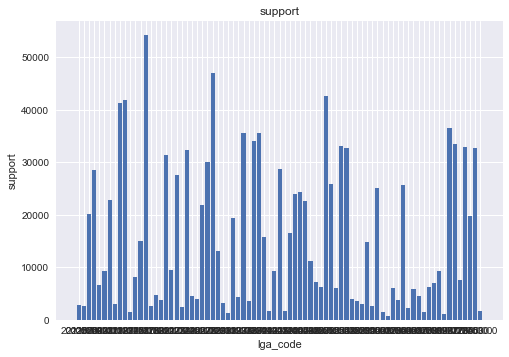

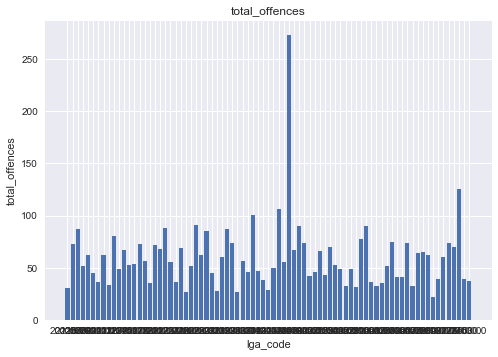

In [18]:
# creating bar charts for any dataframe

xname = 'lga_code'
df = offences

for col in df.columns:
    xaxis = []
    yaxis = []
    yname = col
    for index, row in df.iterrows():
        xaxis.append(float(row[xname]))
        yaxis.append(float(row[yname]))


    # Create the bar chart with xaxiss -> hours, yaxis -> means
    plt.bar(np.arange(len(yaxis)),yaxis)
    plt.xticks(np.arange(len(xaxis)),xaxis)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(yname)
    plt.axes().yaxis.grid(True, which='major')
    plt.show()


In [19]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I



    
    

In [20]:
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


###Definitions for entropy and mutual information
def entropy(T):
    H=0
    N=sum(T)
    for i in range(len(T)):
       if T[i]>0: H+=-T[i]/N*np.log2(T[i]/N)
    return H

def mutualInfo(x,y):
    x=(np.asarray(x)).astype(int)
    y=(np.asarray(y)).astype(int)
    assert(len(x)==len(y))
    
    nx=max(x)
    Tx=np.zeros(nx+1)
    for i in range(len(x)):
        Tx[x[i]]+=1.0
    Hx=entropy(Tx)

    ny=max(y)
    Ty=np.zeros(ny+1)
    for i in range(len(y)):
        Ty[y[i]]+=1.0
    Hy=entropy(Ty)
    
    T=np.zeros((nx+1,ny+1))
    for i in range(len(x)):
        T[x[i],y[i]]+=1.0
    Hxy=0
    for i in range(nx+1):
        for j in range(ny+1):
            if T[i,j]>0:  Hxy+=-T[i,j]/len(x)*np.log2(T[i,j]/len(x))
    
    Hxgy=Hxy-Hy
    Hygx=Hxy-Hx
    minH=min(Hx,Hy)
    
    return {'Hx':Hx,'Hy':Hy,'Hx|y': Hxgy , 'Hy|x': Hygx ,'MI':Hx+Hy-Hxy,'NMI':(Hx+Hy-Hxy)/minH} 

<class 'numpy.float64'>
Pearson r is  -0.294031881563
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 5.401448944187937, 'Hx|y': 0.85169889259676257, 'Hy|x': 2.2745296266968666, 'MI': 3.1269193174910699, 'NMI': 0.7859309821592656}


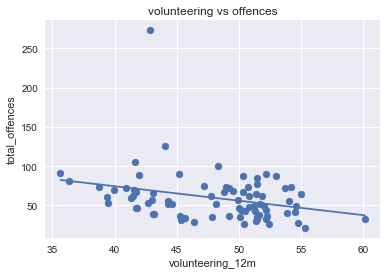

In [21]:
# Scatter plot to find pearson correlation
# finding the pearson corellation between 2 things usin

d = pd.DataFrame({'volunteering_12m':pd.to_numeric(new_community["volunteering_12m"]), 'total_offences':pd.to_numeric(profiles["total_offences"])})



print(type(d['volunteering_12m'][1]))

plt.scatter(d.loc[:,'volunteering_12m'],d.loc[:,'total_offences'])

#trendline


plt.ylabel('total_offences')
plt.xlabel('volunteering_12m')
plt.title('volunteering vs offences')

#line of best fit:
plt.plot(np.unique(d['volunteering_12m']), np.poly1d(np.polyfit(d['volunteering_12m'], d['total_offences'], 1))(np.unique(d['volunteering_12m'])))

print("Pearson r is ",d['volunteering_12m'].corr(d['total_offences']))

#newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
result=mutualInfo(d.loc[:,'volunteering_12m'],d.loc[:,'total_offences'])
print("Entropies and mutual information are", result)

In [22]:
profiles

,unemployment_rate,registered_mental_health,perc_parents_schools,perc_membership_groups,new_dwellings,drug_and_alcohol,perc_children_vulnerable_one,perc_poor_health,perc_people_18_smokers,acsc_vaccine_preventablem,perc_persons_not_physical,lga_code,total_offences,gaming_machine_losses,perc_at_risk_alcohol,perc_households_income_650,perc_persons_not_fruitveg,perc_pop_higher_education,perc_persons_overweight_obese,median_house_price
0,4.903835,16.477538,0.5151,0.6600,6.762008,3.88621172081455,14.516129,18.9998,19.6913,0.854967,26.0961,20110,30.160726,308.9195,11.6000,0.424966,48.4892,0.292141,0.559862,241000.0
1,5.724736,21.120905,0.5110,0.6248,3.492433,9.23000166306336,20.338983,21.1998,20.8768,0.665225,28.1661,20260,72.833477,552.9145,10.0000,0.425102,57.6075,0.249561,0.591836,170000.0
2,7.106465,15.036890,0.4699,0.6387,10.676712,5.7858205771252,20.615385,19.5012,23.6388,0.832492,24.4215,20570,87.259496,756.3957,11.5000,0.370103,54.9718,0.368236,0.499760,262877.0
3,3.044748,9.682170,0.5749,0.5851,4.072467,4.17709599272429,14.634146,15.8184,18.0394,0.788739,27.0449,20660,51.873579,601.2545,10.6000,0.263060,41.6417,0.485552,0.496025,580000.0
4,5.083693,12.074643,0.5546,0.6901,19.274230,9.81468328275328,22.442244,15.9688,19.4213,0.645703,20.2997,20740,62.132908,747.9083,17.2000,0.479231,47.9119,0.267306,0.511050,330000.0
5,4.066393,9.878614,0.5053,0.6395,16.611915,4.91600848069709,22.466960,15.0738,17.5935,0.396077,29.6508,20830,44.595126,400.6032,11.0000,0.357962,48.9811,0.287301,0.512713,265000.0
6,2.585145,6.846006,0.5727,0.6666,6.517069,2.90903857816885,10.540301,12.3365,13.1584,0.555082,20.1377,20910,35.803948,250.5094,13.5000,0.220770,42.5605,0.597869,0.408612,1230000.0
7,6.585849,22.528510,0.4339,0.6440,5.667110,7.97593227453998,22.142857,21.8970,17.4198,1.049465,28.1876,21010,62.254600,468.1479,9.3000,0.407638,44.9586,0.273595,0.539362,221500.0
8,3.248919,7.038057,0.5281,0.7330,4.902452,2.69605385028347,10.753822,12.7996,13.6133,0.607645,27.6519,21110,33.448679,153.4116,6.2000,0.200073,42.4090,0.694994,0.321365,1320000.0
9,7.981622,10.475959,0.5161,0.4703,4.878925,5.50727086479465,26.902039,25.5270,22.0037,1.256693,31.2520,21180,80.828434,1004.3683,4.7000,0.335125,43.4408,0.345093,0.521993,397500.0


Pearson r is  0.809319574103
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 4.2409502010176743, 'Hx|y': 0.84743798474166443, 'Hy|x': 2.6234534638872433, 'MI': 1.6174967371304305, 'NMI': 0.65620266645518166}


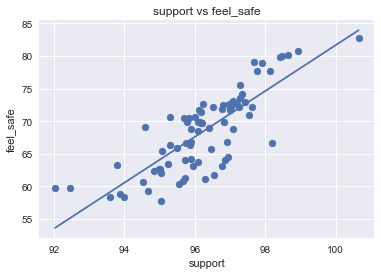

Pearson r is  0.0977490034711
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 6.3037807481771049, 'Hx|y': 0.0, 'Hy|x': 3.8388460263050095, 'MI': 2.4649347218720949, 'NMI': 0.99999999999999978}


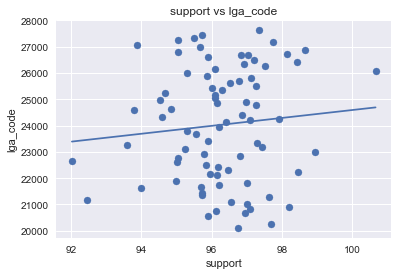

Pearson r is  1.0
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 2.4649347218720954, 'Hx|y': 0.0, 'Hy|x': 0.0, 'MI': 2.4649347218720954, 'NMI': 1.0}


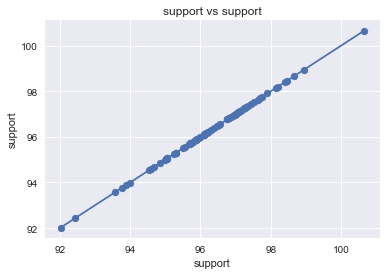

Pearson r is  -0.257393870235
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 2.7041995061950415, 'Hx|y': 1.78439022405475, 'Hy|x': 2.0236550083776961, 'MI': 0.68054449781734494, 'NMI': 0.27609027199733616}


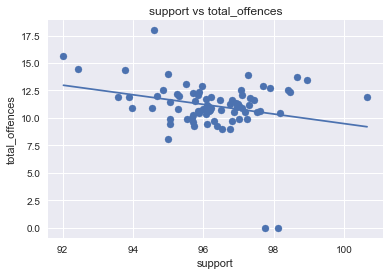

Pearson r is  0.838924833398
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 3.9786182100878329, 'Hx|y': 0.74276088124503703, 'Hy|x': 2.2564443694607745, 'MI': 1.7221738406270584, 'NMI': 0.69866914744057929}


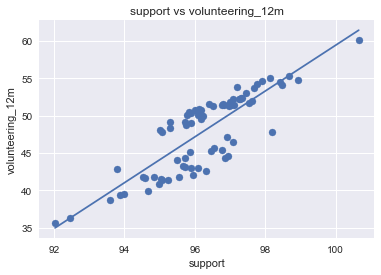

In [23]:
# finding the pearson corellation between 2 things
x_name = 'support'
df_x = new_community
df_y = new_community

for col in new_community.columns:

    new_df = pd.DataFrame({x_name:pd.to_numeric(df_x[x_name]), col:pd.to_numeric(df_y[col])})

    plt.scatter(new_df.loc[:,x_name],new_df.loc[:,col])

    plt.ylabel(col)
    plt.xlabel(x_name)
    curr_title = x_name + str(' vs ') + str(col)
    plt.title(curr_title)

    #line of best fit:
    plt.plot(np.unique(new_df[x_name]), np.poly1d(np.polyfit(new_df[x_name], new_df[col], 1))(np.unique(new_df[x_name])))

    print("Pearson r is ",new_df[x_name].corr(new_df[col]))

    #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
    result=mutualInfo(new_df.loc[:,x_name],new_df.loc[:,col])
    print("Entropies and mutual information are", result)
    plt.show()

<class 'numpy.float64'>
Pearson r is  -0.172352742991
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 2.6099121122883746, 'Hx|y': 3.0131795534733206, 'Hy|x': 1.3821414647440209, 'MI': 1.2277706475443537, 'NMI': 0.47042605065648846}


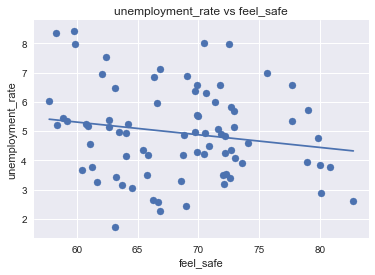

<class 'numpy.int64'>
Pearson r is  -0.189200328244
Entropies and mutual information are {'Hx': 6.3037807481771049, 'Hy': 2.6099121122883746, 'Hx|y': 3.6938686358887303, 'Hy|x': 0.0, 'MI': 2.6099121122883746, 'NMI': 1.0}


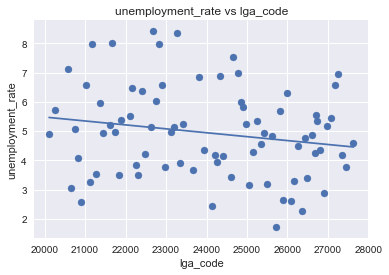

<class 'numpy.float64'>
Pearson r is  -0.488195046876
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 2.6099121122883746, 'Hx|y': 1.9639798340520498, 'Hy|x': 2.108957224468329, 'MI': 0.50095488782004516, 'NMI': 0.2032325170216169}


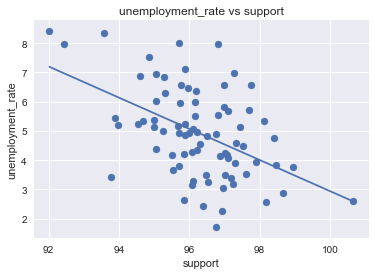

<class 'numpy.float64'>
Pearson r is  0.143424920461
Entropies and mutual information are {'Hx': 2.7041995061950415, 'Hy': 2.6099121122883746, 'Hx|y': 2.2830064598583357, 'Hy|x': 2.1887190659516689, 'MI': 0.42119304633670573, 'NMI': 0.16138208039787327}


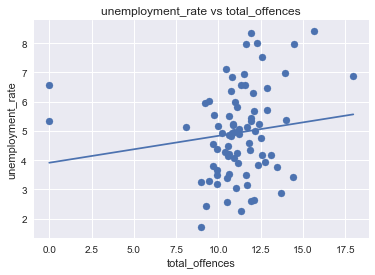

<class 'numpy.float64'>
Pearson r is  -0.268763481002
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 2.6099121122883746, 'Hx|y': 2.8770417369902379, 'Hy|x': 1.5083356391907796, 'MI': 1.1015764730975954, 'NMI': 0.42207416407280152}


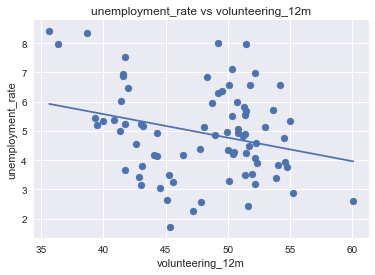

<class 'numpy.float64'>
Pearson r is  0.450375137408
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 4.0277843126053838, 'Hx|y': 2.0481483343058979, 'Hy|x': 1.8349824458936075, 'MI': 2.1928018667117772, 'NMI': 0.54441889051734182}


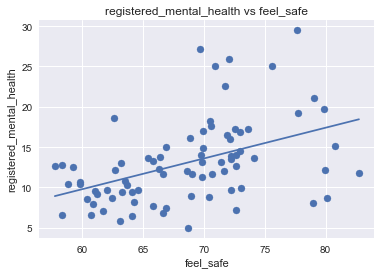

<class 'numpy.int64'>
Pearson r is  0.00215843223613
Entropies and mutual information are {'Hx': 6.3037807481771049, 'Hy': 4.0277843126053838, 'Hx|y': 2.275996435571721, 'Hy|x': 0.0, 'MI': 4.0277843126053829, 'NMI': 0.99999999999999978}


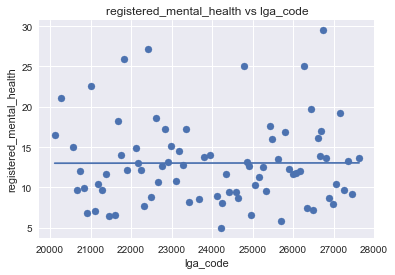

<class 'numpy.float64'>
Pearson r is  0.255621436537
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 4.0277843126053838, 'Hx|y': 1.5147437078828894, 'Hy|x': 3.0775932986161778, 'MI': 0.95019101398920647, 'NMI': 0.38548323635424514}


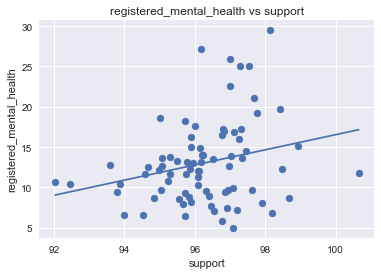

<class 'numpy.float64'>
Pearson r is  -0.257978649307
Entropies and mutual information are {'Hx': 2.7041995061950415, 'Hy': 4.0277843126053838, 'Hx|y': 1.5795464354621789, 'Hy|x': 2.9031312418725213, 'MI': 1.1246530707328626, 'NMI': 0.41589130837292099}


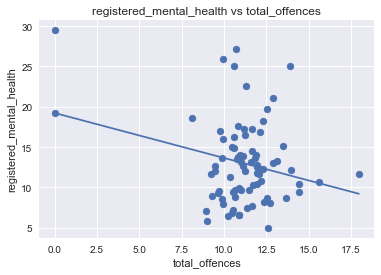

<class 'numpy.float64'>
Pearson r is  0.451733797535
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 4.0277843126053838, 'Hx|y': 1.9721989672172908, 'Hy|x': 2.0213650697348418, 'MI': 2.0064192428705416, 'NMI': 0.50430052267474224}


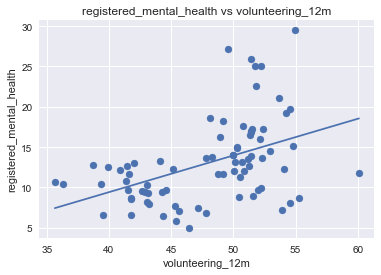

<class 'numpy.float64'>
Pearson r is  0.208922229339
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 0.0, 'Hx|y': 4.2409502010176743, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


/Users/chris/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


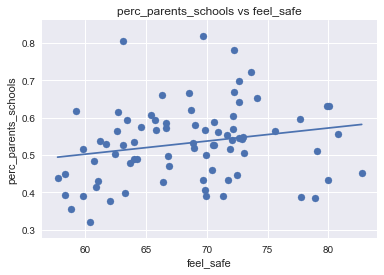

<class 'numpy.int64'>
Pearson r is  0.0542978961407
Entropies and mutual information are {'Hx': 6.3037807481771049, 'Hy': 0.0, 'Hx|y': 6.3037807481771049, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


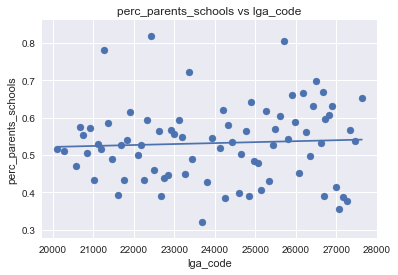

<class 'numpy.float64'>
Pearson r is  0.259501802241
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 0.0, 'Hx|y': 2.4649347218720954, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


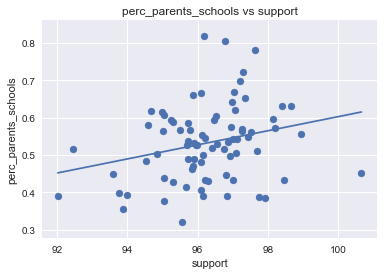

<class 'numpy.float64'>
Pearson r is  0.0158064942704
Entropies and mutual information are {'Hx': 2.7041995061950415, 'Hy': 0.0, 'Hx|y': 2.7041995061950415, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


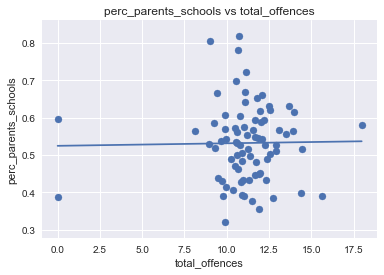

<class 'numpy.float64'>
Pearson r is  0.22492376403
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 0.0, 'Hx|y': 3.9786182100878329, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


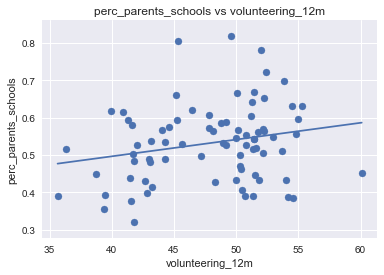

<class 'numpy.float64'>
Pearson r is  0.580744467553
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 0.0, 'Hx|y': 4.2409502010176743, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


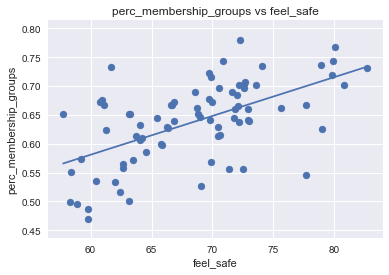

<class 'numpy.int64'>
Pearson r is  0.107945698257
Entropies and mutual information are {'Hx': 6.3037807481771049, 'Hy': 0.0, 'Hx|y': 6.3037807481771049, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


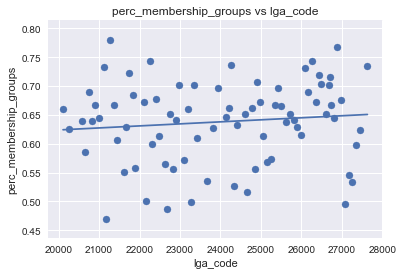

<class 'numpy.float64'>
Pearson r is  0.687492546528
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 0.0, 'Hx|y': 2.4649347218720954, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


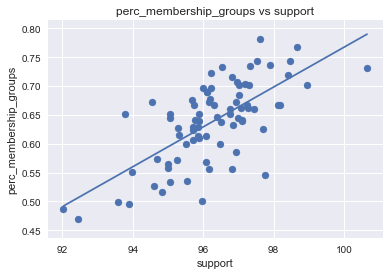

<class 'numpy.float64'>
Pearson r is  -0.137518879499
Entropies and mutual information are {'Hx': 2.7041995061950415, 'Hy': 0.0, 'Hx|y': 2.7041995061950415, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


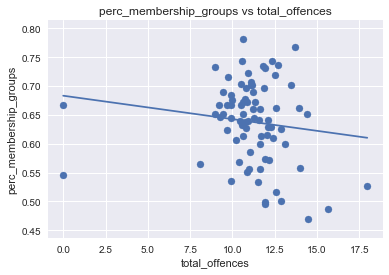

<class 'numpy.float64'>
Pearson r is  0.689962237079
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 0.0, 'Hx|y': 3.9786182100878329, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


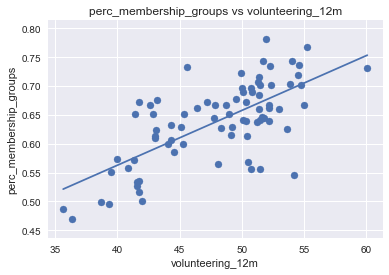

<class 'numpy.float64'>
Pearson r is  -0.2443204091
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 3.9923999222404603, 'Hx|y': 2.0835327246708215, 'Hy|x': 1.8349824458936075, 'MI': 2.1574174763468523, 'NMI': 0.54038110368866799}


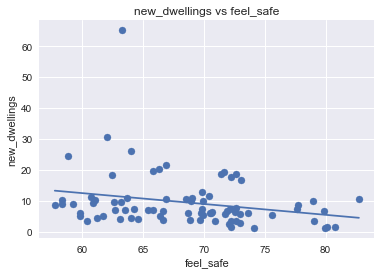

<class 'numpy.int64'>
Pearson r is  0.152477239821
Entropies and mutual information are {'Hx': 6.3037807481771049, 'Hy': 3.9923999222404603, 'Hx|y': 2.3113808259366446, 'Hy|x': 0.0, 'MI': 3.9923999222404598, 'NMI': 0.99999999999999989}


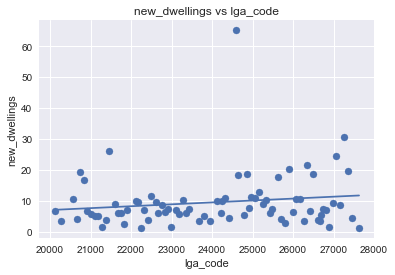

<class 'numpy.float64'>
Pearson r is  -0.323254842827
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 3.9923999222404603, 'Hx|y': 1.4596819333398803, 'Hy|x': 2.9871471337082451, 'MI': 1.0052527885322151, 'NMI': 0.40782126180150313}


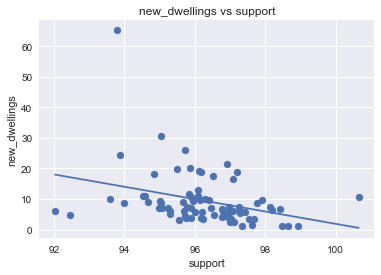

<class 'numpy.float64'>
Pearson r is  0.120526140603
Entropies and mutual information are {'Hx': 2.7041995061950415, 'Hy': 3.9923999222404603, 'Hx|y': 1.6041111679502236, 'Hy|x': 2.8923115839956424, 'MI': 1.1000883382448174, 'NMI': 0.4068073881844253}


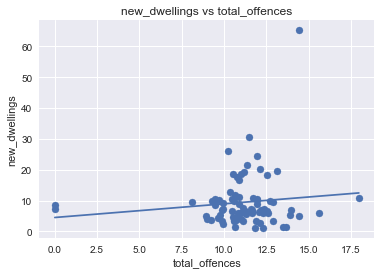

<class 'numpy.float64'>
Pearson r is  -0.244802167862
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 3.9923999222404603, 'Hx|y': 1.9569504461898091, 'Hy|x': 1.9707321583424364, 'MI': 2.0216677638980238, 'NMI': 0.50813313998615439}


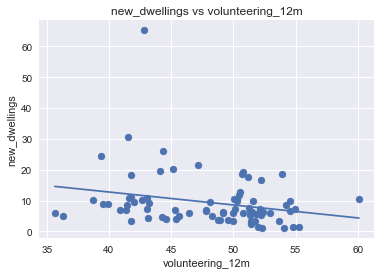

ValueError: Unable to parse string "null" at position 60

In [24]:
# finding the pearson corellation between 2 things

for prof_col in profiles.columns:
    for col in new_community.columns:

        new_df = pd.DataFrame({col:pd.to_numeric(new_community[col]), prof_col:pd.to_numeric(profiles[prof_col])})

        print(type(new_df[col][1]))

        plt.scatter(new_df.loc[:,col],new_df.loc[:,prof_col])

        plt.ylabel(prof_col)
        plt.xlabel(col)
        curr_title = str(prof_col) + ' vs ' + str(col)
        plt.title(curr_title)

        #line of best fit:
        plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[prof_col], 1))(np.unique(new_df[col])))

        print("Pearson r is ",new_df[col].corr(new_df[prof_col]))

        #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
        result=mutualInfo(new_df.loc[:,col],new_df.loc[:,prof_col])
        print("Entropies and mutual information are", result)
        plt.show()

In [25]:
# finding the pearson corellation between 2 things
'''

for col in new_community.columns:
    for prof_col in new_community.columns:
        new_df = pd.DataFrame({col:pd.to_numeric(new_community[col]), prof_col:pd.to_numeric(profiles[prof_col])})

        print(type(new_df[col][1]))

        plt.scatter(new_df.loc[:,col],new_df.loc[:,prof_col])

        plt.ylabel(prof_col)
        plt.xlabel(new_df)
        curr_title = str(prof_col) + ' vs ' + str(col)
        plt.title(curr_title)

        #line of best fit:
        plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[prof_col], 1))(np.unique(new_df[col])))

        print("Pearson r is ",new_df[col].corr(new_df[prof_col]))

        #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
        result=mutualInfo(new_df.loc[:,col],new_df.loc[:,prof_col])
        print("Entropies and mutual information are", result)
        plt.show()
'''

'\n\nfor col in new_community.columns:\n    for prof_col in new_community.columns:\n        new_df = pd.DataFrame({col:pd.to_numeric(new_community[col]), prof_col:pd.to_numeric(profiles[prof_col])})\n\n        print(type(new_df[col][1]))\n\n        plt.scatter(new_df.loc[:,col],new_df.loc[:,prof_col])\n\n        plt.ylabel(prof_col)\n        plt.xlabel(new_df)\n        curr_title = str(prof_col) + \' vs \' + str(col)\n        plt.title(curr_title)\n\n        #line of best fit:\n        plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[prof_col], 1))(np.unique(new_df[col])))\n\n        print("Pearson r is ",new_df[col].corr(new_df[prof_col]))\n\n        #newd=pd.DataFrame.from_dict({\'volunteering_12m\' : [1,1,1,1,2,2,2,2,3,3,3,3],  \'total_offences\' :[1,1,1,2,2,2,3,3,3,4,4,4]})\n        result=mutualInfo(new_df.loc[:,col],new_df.loc[:,prof_col])\n        print("Entropies and mutual information are", result)\n        plt.show()\n'

Pearson r is  0.424550726955
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 3.6344868905358081, 'Hx|y': 1.5381768141439385, 'Hy|x': 2.7077289828076512, 'MI': 0.92675790772815692, 'NMI': 0.37597665346053982}


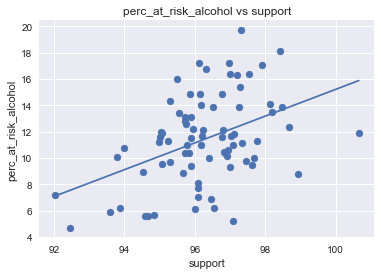

In [26]:
# finding the pearson corellation between 2 things X and Y

x_name = 'support'  #xaxis goes here
x = new_community[x_name]

y_name = 'perc_at_risk_alcohol'
y = profiles[y_name]

new_df = pd.DataFrame({x_name:pd.to_numeric(x), y_name:pd.to_numeric(y)})

plt.scatter(new_df.loc[:,x_name],new_df.loc[:,y_name])

plt.ylabel(y_name)
plt.xlabel(x_name)
curr_title = str(y_name) + ' vs ' + str(x_name)
plt.title(curr_title)

#line of best fit:
plt.plot(np.unique(new_df[x_name]), np.poly1d(np.polyfit(new_df[x_name], new_df[y_name], 1))(np.unique(new_df[x_name])))

print("Pearson r is ",new_df[x_name].corr(new_df[y_name]))

#newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
result=mutualInfo(new_df.loc[:,x_name],new_df.loc[:,y_name])
print("Entropies and mutual information are", result)
plt.show()

In [27]:
# finding the pearson corellation between 2 things

for prof_col in profiles.columns:
    for col in new_community.columns:

        x = pd.to_numeric(profiles[prof_col])
        y = pd.to_numeric(new_community[col])
        
        print(prof_col, col)
        print("Pearson r is ",x.corr(y))

        #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
        #result=mutualInfo(profiles.loc[:,prof_col],new_community.loc[:,col])
        #print("Entropies and mutual information are", result)

unemployment_rate feel_safe
Pearson r is  -0.172352742991
unemployment_rate lga_code
Pearson r is  -0.189200328244
unemployment_rate support
Pearson r is  -0.488195046876
unemployment_rate total_offences
Pearson r is  0.143424920461
unemployment_rate volunteering_12m
Pearson r is  -0.268763481002
registered_mental_health feel_safe
Pearson r is  0.450375137408
registered_mental_health lga_code
Pearson r is  0.00215843223613
registered_mental_health support
Pearson r is  0.255621436537
registered_mental_health total_offences
Pearson r is  -0.257978649307
registered_mental_health volunteering_12m
Pearson r is  0.451733797535
perc_parents_schools feel_safe
Pearson r is  0.208922229339
perc_parents_schools lga_code
Pearson r is  0.0542978961407
perc_parents_schools support
Pearson r is  0.259501802241
perc_parents_schools total_offences
Pearson r is  0.0158064942704
perc_parents_schools volunteering_12m
Pearson r is  0.22492376403
perc_membership_groups feel_safe
Pearson r is  0.58074446755

ValueError: Unable to parse string "null" at position 60

In [28]:
# finding the pearson corellation between 2 things

com = pd.DataFrame({'perc_membership_groups': pd.to_numeric(profiles['perc_membership_groups'])*100})
com['perc_parents_schools'] = pd.to_numeric(profiles["perc_parents_schools"])
#com['median_house_price'] = pd.to_numeric(profiles['median_house_price'])
com['feel_safe'] = pd.to_numeric(new_community['feel_safe'])
com['volunteering_12m'] = pd.to_numeric(new_community['volunteering_12m'])
com['support'] = pd.to_numeric(new_community['support'])


for prof_col in com.columns:
    print(str(" "*23),end='')
    for col in com.columns:
        if (prof_col != col):
            print("{}".format(col.ljust(20)),end=' ')
    print (str(len(str(0.208922229339))))
    print (prof_col,end='')
    for col in com.columns:

        x = pd.to_numeric(com[prof_col])
        y = pd.to_numeric(com[col])
        
        if (prof_col != col):
            #print(prof_col, col)
            p_corr = x.corr(y)
            print("| {:20.4}".format(p_corr), end='')
            #result=mutualInfo(com.loc[:,prof_col],com.loc[:,col])
            #print("Entropies and mutual information are", result)

        #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
        #
    print ("|")
com


                       perc_parents_schools feel_safe            volunteering_12m     support              14
perc_membership_groups|               0.3687|               0.5807|                 0.69|               0.6875|
                       perc_membership_groups feel_safe            volunteering_12m     support              14
perc_parents_schools|               0.3687|               0.2089|               0.2249|               0.2595|
                       perc_membership_groups perc_parents_schools volunteering_12m     support              14
feel_safe|               0.5807|               0.2089|               0.9253|               0.8093|
                       perc_membership_groups perc_parents_schools feel_safe            support              14
volunteering_12m|                 0.69|               0.2249|               0.9253|               0.8389|
                       perc_membership_groups perc_parents_schools feel_safe            volunteering_12m     14
support|       

,perc_membership_groups,perc_parents_schools,feel_safe,volunteering_12m,support
0,66.00,0.5151,71.900469,51.351961,96.761206
1,62.48,0.5110,79.034470,53.657449,97.693200
2,63.87,0.4699,66.870520,50.304949,95.882896
3,58.51,0.5749,64.566458,44.590406,96.946425
4,69.01,0.5546,71.641571,50.814368,96.111692
5,63.95,0.5053,73.037681,52.187001,97.094922
6,66.66,0.5727,66.652871,47.821628,98.190251
7,64.40,0.4339,71.767599,51.807824,96.997741
8,73.30,0.5281,61.692863,45.623801,96.543553
9,47.03,0.5161,59.815886,36.345103,92.445393


<class 'numpy.float64'>
Pearson r is  0.152779559002
Entropies and mutual information are {'Hx': 4.6015318631764091, 'Hy': 4.0277843126053838, 'Hx|y': 2.2000470684831139, 'Hy|x': 1.6262995179120887, 'MI': 2.4014847946932942, 'NMI': 0.59622974030103582}


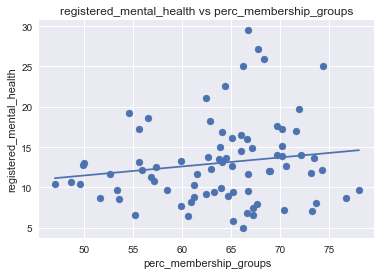

<class 'numpy.float64'>
Pearson r is  0.142210622046
Entropies and mutual information are {'Hx': 0.0, 'Hy': 4.0277843126053838, 'Hx|y': 0.0, 'Hy|x': 4.0277843126053838, 'MI': 0.0, 'NMI': nan}


/Users/chris/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


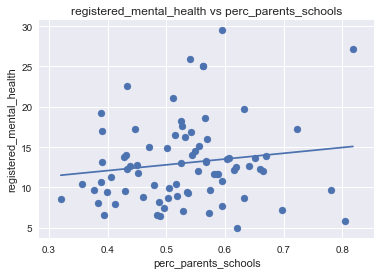

<class 'numpy.float64'>
Pearson r is  0.450375137408
Entropies and mutual information are {'Hx': 4.2409502010176743, 'Hy': 4.0277843126053838, 'Hx|y': 2.0481483343058979, 'Hy|x': 1.8349824458936075, 'MI': 2.1928018667117772, 'NMI': 0.54441889051734182}


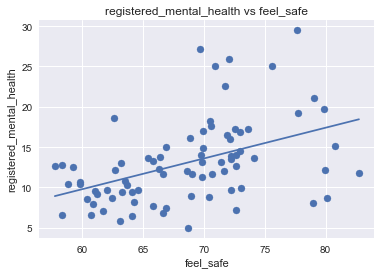

<class 'numpy.float64'>
Pearson r is  0.451733797535
Entropies and mutual information are {'Hx': 3.9786182100878329, 'Hy': 4.0277843126053838, 'Hx|y': 1.9721989672172908, 'Hy|x': 2.0213650697348418, 'MI': 2.0064192428705416, 'NMI': 0.50430052267474224}


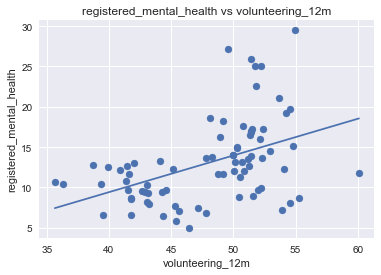

<class 'numpy.float64'>
Pearson r is  0.255621436537
Entropies and mutual information are {'Hx': 2.4649347218720954, 'Hy': 4.0277843126053838, 'Hx|y': 1.5147437078828894, 'Hy|x': 3.0775932986161778, 'MI': 0.95019101398920647, 'NMI': 0.38548323635424514}


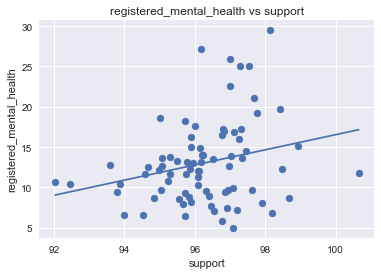

In [30]:
# finding the pearson corellation between 2 things
y_name = 'registered_mental_health'

for col in com.columns:

    new_df = pd.DataFrame({col:pd.to_numeric(com[col]), y_name:pd.to_numeric(profiles[y_name])})

    print(type(new_df[col][1]))

    plt.scatter(new_df.loc[:,col],new_df.loc[:,y_name])

    plt.ylabel(y_name)
    plt.xlabel(col)
    curr_title = y_name + str(' vs ') + str(col)
    plt.title(curr_title)

    #line of best fit:
    plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[y_name], 1))(np.unique(new_df[col])))

    print("Pearson r is ",new_df[col].corr(new_df[y_name]))

    #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
    result=mutualInfo(new_df.loc[:,col],new_df.loc[:,y_name])
    print("Entropies and mutual information are", result)
    plt.show()

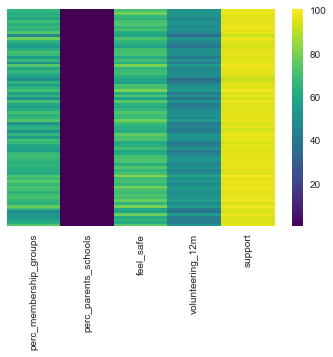

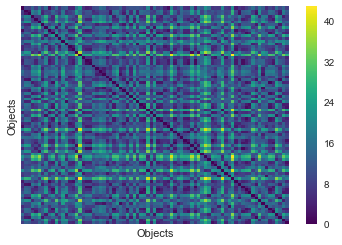

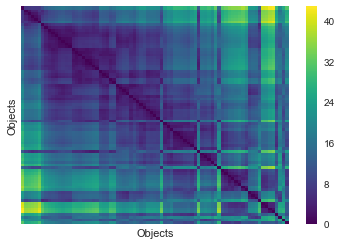

In [31]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris2=com #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()



####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().as_matrix()
np.random.shuffle(iris3)   ####randomise the order of rows (objects)
sq = squareform(pdist(iris3))   ###commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

In [65]:
new_com = com
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA##########################################################
#######Example of performing PCA on Iris dataset and visualising####################
##########################################################


sklearn_pca = sklearnPCA(n_components=2)   #we want just the first two PCs
iris_sklearn = sklearn_pca.fit_transform(iris2)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   #print out the amount of variance explained by each PC

#set up the colour scheme
palette=palette = ['blue','green','red']
colors= pd.Series(new_com).Name.replace(to_replace=new_com.Name.unique(),value=palette).tolist()

#plot the objects along the first two principal components, using the colour scheme
plt.scatter(iris_sklearn[:,0],iris_sklearn[:,1],s=60,c=colors)   #plot the PC's in 2D
plt.xlabel('1st Principal Component', fontsize=28)
plt.ylabel('2nd Principal Component', fontsize=28)
plt.show()

Variance explained by each PC [ 0.80348306  0.17554422]


AttributeError: 'Series' object has no attribute 'Name'

In [33]:
com
small_com = pd.DataFrame({'lga_code': new_community['lga_code']})
small_com['volunteering_12m'] = com['volunteering_12m']
small_com['support'] = com['support']
small_com['feel_safe'] = com['feel_safe']
small_com



,lga_code,volunteering_12m,support,feel_safe
0,20110,51.351961,96.761206,71.900469
1,20260,53.657449,97.693200,79.034470
2,20570,50.304949,95.882896,66.870520
3,20660,44.590406,96.946425,64.566458
4,20740,50.814368,96.111692,71.641571
5,20830,52.187001,97.094922,73.037681
6,20910,47.821628,98.190251,66.652871
7,21010,51.807824,96.997741,71.767599
8,21110,45.623801,96.543553,61.692863
9,21180,36.345103,92.445393,59.815886


In [34]:
rel_cols = ['volunteering_12m', 'support', 'feel_safe']

max_vol = max(small_com['volunteering_12m'])
min_vol = min(small_com['volunteering_12m'])

max_sup = max(small_com['support'])
min_sup = min(small_com['support'])

max_safe = max(small_com['feel_safe'])
min_safe = min(small_com['feel_safe'])

norms = []
for index, row in small_com.iterrows():
    
    n1 = (row['volunteering_12m'] - min_vol) / (max_vol - min_vol)
    n2 = (row['support'] - min_sup) / (max_sup - min_sup)
    n3 = (row['feel_safe'] - min_safe) / (max_safe - min_safe)
    
    n = (n1+n2+n3)/3.0
    norms.append(n)

small_com['norms'] = norms


In [35]:
small_com['rank'] = small_com['norms'].rank(ascending=False)
small_com


,lga_code,volunteering_12m,support,feel_safe,norms,rank
0,20110,51.351961,96.761206,71.900469,0.585792,25.0
1,20260,53.657449,97.693200,79.034470,0.748313,8.0
2,20570,50.304949,95.882896,66.870520,0.470552,45.0
3,20660,44.590406,96.946425,64.566458,0.402976,50.0
4,20740,50.814368,96.111692,71.641571,0.549927,29.0
5,20830,52.187001,97.094922,73.037681,0.625226,16.0
6,20910,47.821628,98.190251,66.652871,0.522888,33.0
7,21010,51.807824,96.997741,71.767599,0.599373,22.0
8,21110,45.623801,96.543553,61.692863,0.363211,55.0
9,21180,36.345103,92.445393,59.815886,0.053383,78.0


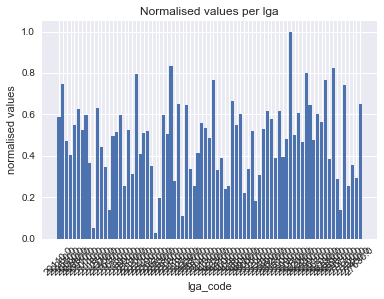

In [36]:
#Normalised values for the bar chart

xname = 'lga_code'
col = 'norms'
xaxis = []
yaxis = []

# For each hour in the day, find the mean income_efficiency and put
# the data in hours[] and means[]


xaxis = []
yaxis = []
yname = col

# sort by the norm
#sorted = small_com.sort_values("norms", ascending=False)
sorted_vals = small_com
sorted_vals['lga_name'] = lga_names['lga_name']
for index, row in sorted_vals.iterrows():
    xaxis.append(float(row[xname]))
    yaxis.append(float(row[yname]))


# Create the bar chart with xaxiss -> hours, yaxis -> means
plt.bar(np.arange(len(yaxis)),yaxis)
plt.xticks(np.arange(len(xaxis)),xaxis, rotation = 45)
plt.ylabel('normalised values')
plt.xlabel(xname)
plt.title('Normalised values per lga')
plt.axes().yaxis.grid(True, which='major')
plt.show()


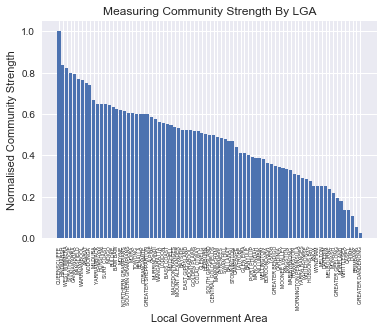

In [103]:
#Normalised values for the bar chart

xname = 'lga_name'
col = 'norms'
xaxis = []
yaxis = []

# For each hour in the day, find the mean income_efficiency and put
# the data in hours[] and means[]


xaxis = []
yaxis = []
yname = col

# sort by the norm
sorted_vals = small_com.sort_values("norms", ascending=False)
#sorted_vals = small_com
sorted_vals['lga_name'] = lga_names['lga_name']
for index, row in sorted_vals.iterrows():
    xaxis.append(row[xname])
    yaxis.append(float(row[yname]))


# Create the bar chart with xaxiss -> hours, yaxis -> means
plt.bar(np.arange(len(yaxis)),yaxis)

plt.xticks(np.arange(len(xaxis)),xaxis, rotation = 90, fontsize = 5)
plt.ylabel('Normalised Community Strength')
plt.xlabel('Local Government Area')
plt.title('Measuring Community Strength By LGA')
plt.axes().yaxis.grid(True, which='major')

plt.show()



Pearson r is  -0.30230302848
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 2.6099121122883746, 'Hx|y': 0.049368791517596211, 'Hy|x': 2.5613403210877967, 'MI': 0.048571791200577863, 'NMI': 0.4959312049464123}


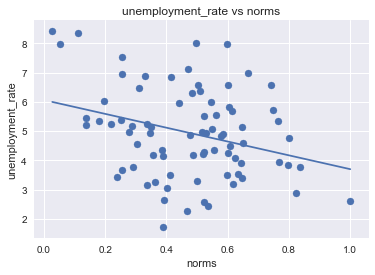

Pearson r is  0.418438922438
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 4.0277843126053838, 'Hx|y': 0.045691651575149983, 'Hy|x': 3.9755353814623597, 'MI': 0.052248931143024535, 'NMI': 0.53347580433916575}


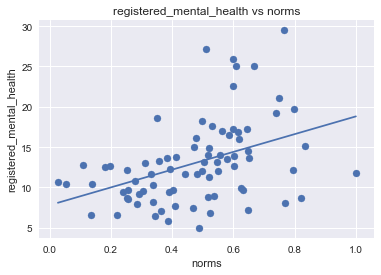

Pearson r is  0.238573961926
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 0.0, 'Hx|y': 0.09794058271817413, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


/Users/chris/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


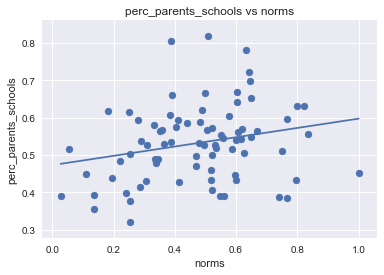

Pearson r is  0.676869261308
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 0.0, 'Hx|y': 0.09794058271817413, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


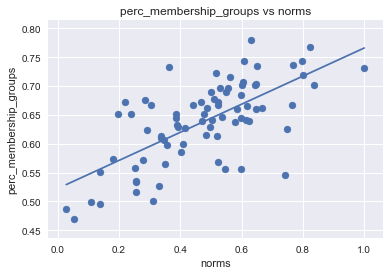

Pearson r is  -0.27797433044
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 3.9923999222404603, 'Hx|y': 0.052426701899699335, 'Hy|x': 3.9468860414219855, 'MI': 0.045513880818474739, 'NMI': 0.46470910786228203}


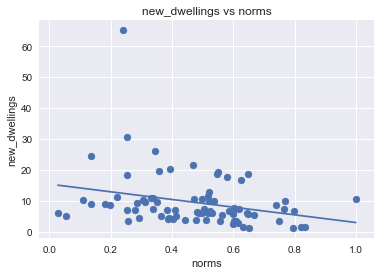

ValueError: Unable to parse string "null" at position 60

In [69]:
# finding the pearson corellation between 2 things
col = 'norms'
for prof_col in profiles.columns:

    new_df = pd.DataFrame({col:pd.to_numeric(small_com[col]), prof_col:pd.to_numeric(profiles[prof_col])})

    plt.scatter(new_df.loc[:,col],new_df.loc[:,prof_col])

    plt.ylabel(prof_col)
    plt.xlabel(col)
    curr_title = str(prof_col) + ' vs ' + str(col)
    plt.title(curr_title)

    #line of best fit:
    plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[prof_col], 1))(np.unique(new_df[col])))

    print("Pearson r is ",new_df[col].corr(new_df[prof_col]))

    #newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
    result=mutualInfo(new_df.loc[:,col],new_df.loc[:,prof_col])
    print("Entropies and mutual information are", result)
    plt.show()

Pearson r is  0.486808923027
Entropies and mutual information are {'Hx': 0.09794058271817413, 'Hy': 0.0, 'Hx|y': 0.09794058271817413, 'Hy|x': 0.0, 'MI': 0.0, 'NMI': nan}


/Users/chris/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


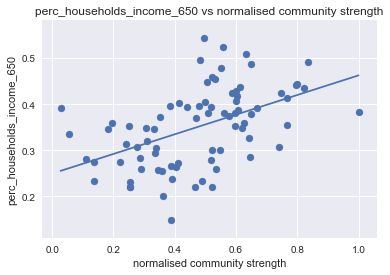

In [119]:
# finding the pearson corellation between 2 things
col = 'norms'

#CHANGE THIS TO GET DIFFERENT COLS
prof_col = profiles.columns[15]
#prof_col = 'drug_and_alcohol'

new_df = pd.DataFrame({col:pd.to_numeric(small_com[col]), prof_col:pd.to_numeric(profiles[prof_col])})

plt.scatter(new_df.loc[:,col],new_df.loc[:,prof_col])

plt.ylabel(prof_col)
plt.xlabel('normalised community strength')
curr_title = str(prof_col) + ' vs ' + str('normalised community strength')
plt.title(curr_title)

#line of best fit:
plt.plot(np.unique(new_df[col]), np.poly1d(np.polyfit(new_df[col], new_df[prof_col], 1))(np.unique(new_df[col])))

print("Pearson r is ",new_df[col].corr(new_df[prof_col]))

#newd=pd.DataFrame.from_dict({'volunteering_12m' : [1,1,1,1,2,2,2,2,3,3,3,3],  'total_offences' :[1,1,1,2,2,2,3,3,3,4,4,4]})
result=mutualInfo(new_df.loc[:,col],new_df.loc[:,prof_col])
print("Entropies and mutual information are", result)
plt.show()

In [1]:
import pandas
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

data=pd.read_csv('data/mpg.csv',encoding = 'ISO-8859-1')


##normalise data
data['mpg'] = (data['mpg']-data['mpg'].min())/(data['mpg'].max()-data['mpg'].min())
data['weight'] = (data['weight']-data['weight'].min())/(data['weight'].max()-data['weight'].min())
data['cylinders'] = (data['cylinders']-data['cylinders'].min())/(data['cylinders'].max()-data['cylinders'].min())
data['horsepower'] = (data['horsepower']-data['horsepower'].min())/(data['horsepower'].max()-data['horsepower'].min())
data['model_year'] = (data['model_year']-data['model_year'].min())/(data['model_year'].max()-data['model_year'].min())

###Set 'name' to be empty since it is a string.   'name' is  the class feature used to color the objects, but for this
## case we just want all objects to be the same colour, hence we make it empty.  More generally, one can use a categorical
##feature to determine the line colors.  

data['name']=''

###plot in parallel co-ordinates
#a document showing the parallel-coordinates API is at
#https://groups.google.com/forum/#!topic/glue-viz/5-ljzYj4Qnc

parallel_coordinates(data[['mpg','cylinders','horsepower','weight','model_year','name']],'name')
plt.show()


NameError: name 'pd' is not defined

# 